In [1]:
# --- imports ---

import os
import andes

from shapely.geometry import Point, LineString
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

import contextily as cx

In [2]:
path_proj = os.getcwd()
path_case = os.path.join(path_proj, 'case')
path_data = os.path.join(path_proj, 'data')
path_map = os.path.join(path_proj, 'map')

path_out = os.path.join(os.path.abspath('..'), 'output')

sscase = os.path.join(path_case, 'ieee39_htb.xlsx')

ss = andes.load(sscase,
                no_output=True,
                default_config=False,
                setup=False)

In [3]:
map_state_name = "cb_2018_us_state_500k.zip"
map_county_name = "cb_2018_us_county_within_cd116_500k.zip"
map_division_name = "cb_2018_us_division_500k.zip"
map_ISO_name = "ISO_shp.zip"

# Read in shapefile of US states
map_dv = gpd.read_file(os.path.join(path_map, map_division_name))
map_st = gpd.read_file(os.path.join(path_map, map_state_name))
map_ct = gpd.read_file(os.path.join(path_map, map_county_name))
map_ISO = gpd.read_file(os.path.join(path_map, map_ISO_name))
map_ISO['color'] = ['#ff0000', '#00ffff', '#ccebc5', '#0000ff', '#d2bbd5', '#ff8000', '#edf09c']

# Filter the map data to only include the Northeast states
dv_ne_idx = ['1', '2']

dv_ne = map_dv[map_dv['GEOID'].isin(dv_ne_idx)]

# --- Power System Topology ---

# --- Bus Data ---
bus_gen = list(ss.PV.bus.v) + list(ss.Slack.bus.v)
bus_load = list(ss.PQ.bus.v)

xcoord_bus_gen = ss.Bus.get(src='xcoord', idx=bus_gen, attr='v')
ycoord_bus_gen = ss.Bus.get(src='ycoord', idx=bus_gen, attr='v')

xcoord_bus_load = ss.Bus.get(src='xcoord', idx=bus_load, attr='v')
ycoord_bus_load = ss.Bus.get(src='ycoord', idx=bus_load, attr='v')

p_bus = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
    ss.Bus.xcoord.v, ss.Bus.ycoord.v))
p_bus_gen = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
    xcoord_bus_gen, ycoord_bus_gen))
p_bus_load = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
    xcoord_bus_load, ycoord_bus_load))

# --- Line Data ---
transmission_lines = []

line_bus1 = ss.Line.get(src='bus1', idx=ss.Line.idx.v, attr='v')
line_bus2 = ss.Line.get(src='bus2', idx=ss.Line.idx.v, attr='v')

for bus1, bus2 in zip(line_bus1, line_bus2):
    bus1x = ss.Bus.get(src='xcoord', idx=bus1, attr='v')
    bus1y = ss.Bus.get(src='ycoord', idx=bus1, attr='v')
    bus2x = ss.Bus.get(src='xcoord', idx=bus2, attr='v')
    bus2y = ss.Bus.get(src='ycoord', idx=bus2, attr='v')
    line_coords = [(bus1x, bus1y), (bus2x, bus2y)]
    transmission_lines.append(LineString(line_coords))

l_lines = gpd.GeoDataFrame(geometry=transmission_lines)

# Conversion, required if using basemap
# dv_ne = dv_ne.to_crs(epsg=3857)
# map_st = map_st.to_crs(epsg=3857)
# p_bus = p_bus.to_crs(epsg=3857)
# p_bus_gen = p_bus_gen.to_crs(epsg=3857)
# p_bus_load = p_bus_load.to_crs(epsg=3857)
# l_lines = l_lines.to_crs(epsg=3857)


In [4]:
%matplotlib inline

Text(0.5, 1.0, 'IEEE 39-bus Test System Topology')

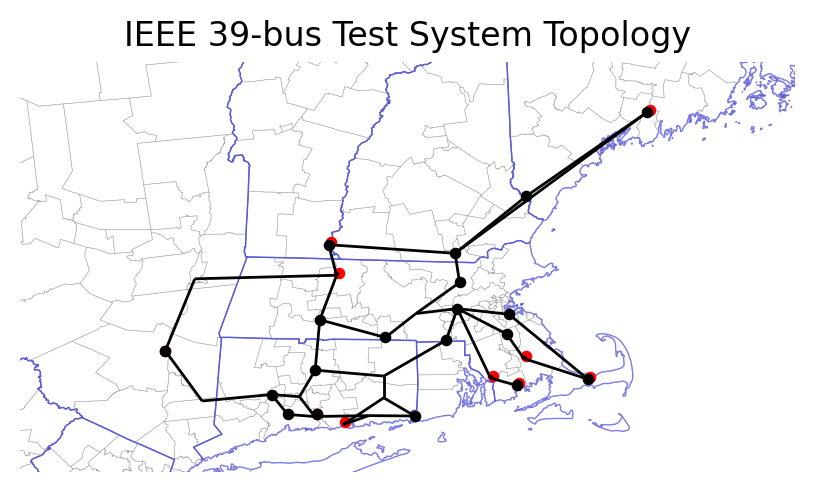

In [25]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=200)

map_st.plot(ax=ax, alpha=0.5, edgecolor='blue', facecolor='none',
            linestyle='-', linewidth=0.5)
map_ct.plot(ax=ax, alpha=0.5, edgecolor='gray', facecolor='none',
            linestyle='-', linewidth=0.2)
# map_ISO.plot(ax=ax, edgecolor=map_ISO['color'], facecolor=map_ISO['color'],
#              alpha=0.5, linewidth=2)

markersize = 10
l_lines.plot(ax=ax, color='black', linewidth=1)
p_bus_gen.plot(ax=ax, markersize=markersize, color='red')
p_bus_load.plot(ax=ax, markersize=markersize, color='black')

# cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)


marginx = 0.3
marginy = 0.15
x_min, y_min, x_max, y_max = p_bus.total_bounds
x_range = x_max - x_min
y_range = y_max - y_min
ax.set_xlim(x_min - marginx * x_range, x_max + marginx * x_range)
ax.set_ylim(y_min - marginy * y_range, y_max + marginy * y_range)

ax.set_axis_off()

ax.set_title('IEEE 39-bus Test System Topology')

In [ ]:
map_name = "cb_2018_us_cd116_500k.shp"

# Read in shapefile of US states
usa_map = gpd.read_file(os.path.join(path_map, map_name))

# --- Bus Data ---
bus_gen = list(ss.PV.bus.v) + list(ss.Slack.bus.v)
bus_load = list(ss.PQ.bus.v)

xcoord_bus_gen = ss.Bus.get(src='xcoord', idx=bus_gen, attr='v')
ycoord_bus_gen = ss.Bus.get(src='ycoord', idx=bus_gen, attr='v')

xcoord_bus_load = ss.Bus.get(src='xcoord', idx=bus_load, attr='v')
ycoord_bus_load = ss.Bus.get(src='ycoord', idx=bus_load, attr='v')

p_bus = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
    ss.Bus.xcoord.v, ss.Bus.ycoord.v))
p_bus_gen = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
    xcoord_bus_gen, ycoord_bus_gen))
p_bus_load = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
    xcoord_bus_load, ycoord_bus_load))

# --- Line Data ---

transmission_lines = []

line_bus1 = ss.Line.get(src='bus1', idx=ss.Line.idx.v, attr='v')
line_bus2 = ss.Line.get(src='bus2', idx=ss.Line.idx.v, attr='v')

for bus1, bus2 in zip(line_bus1, line_bus2):
    bus1x = ss.Bus.get(src='xcoord', idx=bus1, attr='v')
    bus1y = ss.Bus.get(src='ycoord', idx=bus1, attr='v')
    bus2x = ss.Bus.get(src='xcoord', idx=bus2, attr='v')
    bus2y = ss.Bus.get(src='ycoord', idx=bus2, attr='v')
    line_coords = [(bus1x, bus1y), (bus2x, bus2y)]
    transmission_lines.append(LineString(line_coords))

l_lines = gpd.GeoDataFrame(geometry=transmission_lines)

# --- Plotting ---
ax_map = usa_map.plot(figsize=(10, 6))
# cx.add_basemap(ax_map, source=cx.providers.Stamen.TonerLite)

ax, markersize, facecolor = ax_map, 20, 'none'
l_lines.plot(ax=ax, color='black', linewidth=1)
p_bus_gen.plot(ax=ax, markersize=markersize, color='red')
p_bus_load.plot(ax=ax, markersize=markersize, color='black')

# cx.add_basemap(ax=ax, crs=world.crs.to_string(),
#                source=cx.providers.Stamen.TonerLite)

# Get the extent of the points
marginx = 0.3
marginy = 0.15
x_min, y_min, x_max, y_max = p_bus.total_bounds
x_range = x_max - x_min
y_range = y_max - y_min
ax_map.set_xlim(x_min - marginx * x_range, x_max + marginx * x_range)
ax_map.set_ylim(y_min - marginy * y_range, y_max + marginy * y_range)

ax_map.set_axis_off()
ax_map.set_title('System topology')

# for name, x, y in zip(ss.Bus.name.v, ss.Bus.xcoord.v, ss.Bus.ycoord.v):
#     if 'LOAD' in name:
#         ax.annotate(name, ( x, y,),
#                     color='black', fontsize=8,
#                     ha='right', va='top')


In [ ]:
# Read shapefile and plot map
# world = gpd.read_file(gpd.datasets.get_path('nybb'))

usa_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa_map = usa_map[usa_map.name == 'United States']
usa_map.plot(ax=ax_map, edgecolor='black', facecolor='none')

# --- Bus Data ---
bus_gen = list(ss.PV.bus.v) + list(ss.Slack.bus.v)
bus_load = list(ss.PQ.bus.v)

xcoord_bus_gen = ss.Bus.get(src='xcoord', idx=bus_gen, attr='v')
ycoord_bus_gen = ss.Bus.get(src='ycoord', idx=bus_gen, attr='v')

xcoord_bus_load = ss.Bus.get(src='xcoord', idx=bus_load, attr='v')
ycoord_bus_load = ss.Bus.get(src='ycoord', idx=bus_load, attr='v')

p_bus = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
    ss.Bus.xcoord.v, ss.Bus.ycoord.v))
p_bus_gen = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
    xcoord_bus_gen, ycoord_bus_gen))
p_bus_load = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
    xcoord_bus_load, ycoord_bus_load))

# --- Line Data ---

transmission_lines = []

line_bus1 = ss.Line.get(src='bus1', idx=ss.Line.idx.v, attr='v')
line_bus2 = ss.Line.get(src='bus2', idx=ss.Line.idx.v, attr='v')

for bus1, bus2 in zip(line_bus1, line_bus2):
    bus1x = ss.Bus.get(src='xcoord', idx=bus1, attr='v')
    bus1y = ss.Bus.get(src='ycoord', idx=bus1, attr='v')
    bus2x = ss.Bus.get(src='xcoord', idx=bus2, attr='v')
    bus2y = ss.Bus.get(src='ycoord', idx=bus2, attr='v')
    line_coords = [(bus1x, bus1y), (bus2x, bus2y)]
    transmission_lines.append(LineString(line_coords))

l_lines = gpd.GeoDataFrame(geometry=transmission_lines)

# --- Plotting ---
fig_map, ax_map = plt.subplots(figsize=(10, 6))
plt.ioff()
usa_map.plot(ax=ax_map, edgecolor='black', facecolor='none')

ax, markersize, facecolor = ax_map, 20, 'none'
p_bus_gen.plot(ax=ax, markersize=markersize, facecolor=facecolor, edgecolor='red')
p_bus_load.plot(ax=ax, markersize=markersize, facecolor=facecolor, edgecolor='black')
l_lines.plot(ax=ax, color='black', linewidth=2)

# cx.add_basemap(ax=ax, crs=world.crs.to_string(),
#                source=cx.providers.Stamen.TonerLite)

# Get the extent of the points
marginx = 0.3
marginy = 0.15
x_min, y_min, x_max, y_max = p_bus.total_bounds
x_range = x_max - x_min
y_range = y_max - y_min
ax_map.set_xlim(x_min - marginx * x_range, x_max + marginx * x_range)
ax_map.set_ylim(y_min - marginy * y_range, y_max + marginy * y_range)

ax_map.set_axis_off()

# df_wm = world.to_crs(epsg=3857)
# ax_map = df_wm.plot(ax=ax_map, alpha=0.5, edgecolor='k')

plt.show(block=True)

# plt.show()

In [ ]:
try:
    import geopandas as gpd
    # Read shapefile and plot map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
    points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
        ss.Bus.xcoord.v, ss.Bus.ycoord.v))

    fig_map, ax_map = plt.subplots(figsize=(12,6))
    world.plot(ax=ax_map, color='white', edgecolor='black')
    points.plot(ax=ax_map, markersize=100, color='red')
    # Get the extent of the points
    margin = 0.2
    x_min, y_min, x_max, y_max = points.total_bounds
    x_range = x_max - x_min
    y_range = y_max - y_min
    ax_map.set_xlim(x_min - margin * x_range, x_max + margin * x_range)
    ax_map.set_ylim(y_min - margin * y_range, y_max + margin * y_range)
    plt.show()
except ImportError:
    print('Geopandas not found')
